In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Step 1: Data Collection
# Load the dataset (example: Amazon Reviews Dataset)
data = pd.read_csv("1429_1.csv")

# Display the dataset structure and sample entries
print("Dataset Shape:", data.shape)
print("Sample Data:")
print(data.head())

Dataset Shape: (34660, 21)
Sample Data:
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                  

C:\Users\mehak\AppData\Local\Temp\ipykernel_17956\595529005.py:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("1429_1.csv")


In [6]:
# Step 2: Data Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Cleans text by removing special characters, punctuation, and stop words."""
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize text
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = ' '.join(text)  # Join text back into a single string
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
print(data.columns)

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


In [14]:
# Apply the cleaning function to the correct column
data['cleaned_review'] = data['reviews.text'].apply(lambda x: clean_text(str(x)))

In [15]:
print(data.columns)  # Verify available column names
print(data[['reviews.text']].head())  # Preview the first few entries in the column

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'cleaned_review'],
      dtype='object')
                                        reviews.text
0  This product so far has not disappointed. My c...
1  great for beginner or experienced person. Boug...
2  Inexpensive tablet for him to use and learn on...
3  I've had my Fire HD 8 two weeks now and I love...
4  I bought this for my grand daughter when she c...


In [17]:
print(data.columns)

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'cleaned_review'],
      dtype='object')


In [18]:
y = data['reviews.rating']  # Correct column for review ratings

In [20]:
# Step 3: Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()

# Replace 'overall' with the correct column name for ratings
y = data['reviews.rating']  # Correct column for ratings


In [21]:
# Step 4: Classification - Traditional ML Approaches
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Remove rows where y_train is NaN
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train.dropna()

# Fit the model
model = MultinomialNB()
model.fit(X_train_clean, y_train_clean)

MultinomialNB()

In [24]:
from sklearn.impute import SimpleImputer

# Impute missing target values with the most frequent class
imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

In [25]:
# Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train_imputed.ravel())


MultinomialNB()

In [27]:
# Remove rows where y_test is NaN
X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test.dropna()

# Evaluate the model with cleaned data
y_pred = model.predict(X_test_clean)
accuracy = accuracy_score(y_test_clean, y_pred)
f1 = f1_score(y_test_clean, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test_clean, y_pred))

Accuracy: 0.708176827506501
F1 Score: 0.6198572003639718
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        80
         2.0       0.00      0.00      0.00        81
         3.0       0.00      0.00      0.00       278
         4.0       0.52      0.11      0.19      1699
         5.0       0.72      0.98      0.83      4784

    accuracy                           0.71      6922
   macro avg       0.25      0.22      0.20      6922
weighted avg       0.63      0.71      0.62      6922



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.impute import SimpleImputer

# Impute missing target values in y_test with the most frequent class
imputer = SimpleImputer(strategy='most_frequent')
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1))

# Evaluate the model with imputed data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_imputed.ravel(), y_pred)
f1 = f1_score(y_test_imputed.ravel(), y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test_imputed.ravel(), y_pred))

Accuracy: 0.7081650317368725
F1 Score: 0.6201098897637656
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        80
         2.0       0.00      0.00      0.00        81
         3.0       0.00      0.00      0.00       278
         4.0       0.52      0.11      0.19      1699
         5.0       0.72      0.98      0.83      4794

    accuracy                           0.71      6932
   macro avg       0.25      0.22      0.20      6932
weighted avg       0.63      0.71      0.62      6932



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


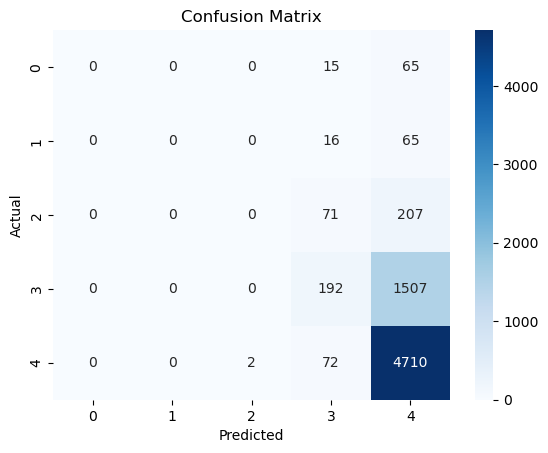

In [30]:
# Remove rows where y_test is NaN
X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test.dropna()

# Generate and plot the confusion matrix
y_pred = model.predict(X_test_clean)
conf_matrix = confusion_matrix(y_test_clean, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

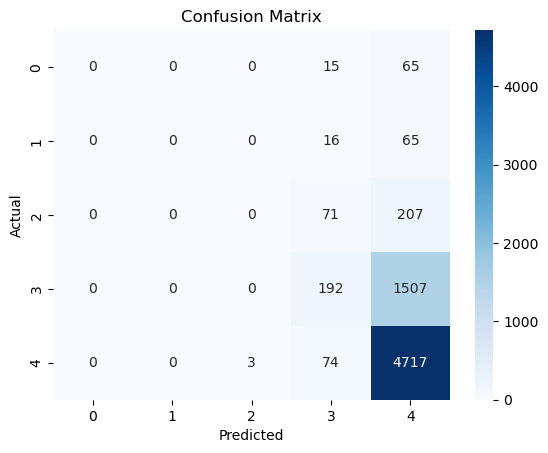

In [32]:
from sklearn.impute import SimpleImputer

# Impute missing target values in y_test with the most frequent class
imputer = SimpleImputer(strategy='most_frequent')
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1))

# Generate and plot the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test_imputed.ravel(), y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:

# Step 5: Sequence-to-Sequence with Bi-LSTM (Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [34]:
# Tokenization and Padding
max_words = 5000
max_len = 100


In [35]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_review'])
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')


In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [37]:
# Build the Bi-LSTM model
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\mehak\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [47]:
# Train the model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0000e+00 - loss: nan

KeyboardInterrupt: 

In [40]:
# Remove rows where y_test contains NaN
X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test.dropna()

# Predict with the model
y_pred_lstm = (model_lstm.predict(X_test_clean) > 0.5).astype("int32")

# Calculate F1 Score
f1_lstm = f1_score(y_test_clean, y_pred_lstm, average='weighted')
print(f"Bi-LSTM Model Accuracy: {accuracy}")
print(f"Bi-LSTM Model F1 Score: {f1_lstm}")

217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Bi-LSTM Model Accuracy: 0.0
Bi-LSTM Model F1 Score: 0.0


In [41]:
from sklearn.impute import SimpleImputer

# Impute missing target values in y_test with the most frequent class
imputer = SimpleImputer(strategy='most_frequent')
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1))

# Predict with the model
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Calculate F1 Score
f1_lstm = f1_score(y_test_imputed.ravel(), y_pred_lstm, average='weighted')
print(f"Bi-LSTM Model Accuracy: {accuracy}")
print(f"Bi-LSTM Model F1 Score: {f1_lstm}")


217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Bi-LSTM Model Accuracy: 0.0
Bi-LSTM Model F1 Score: 0.0


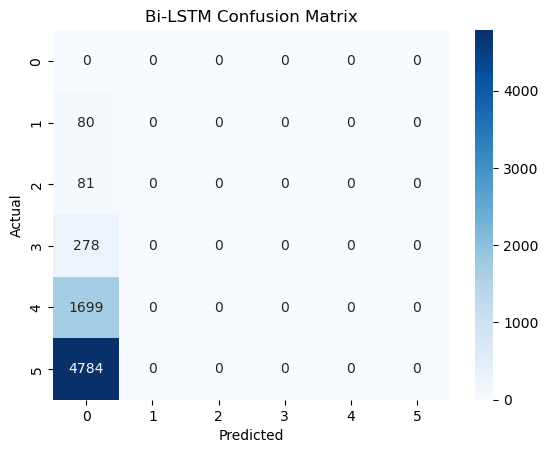

In [43]:
# Remove rows where y_test contains NaN
X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test.dropna()
y_pred_lstm_clean = y_pred_lstm[~y_test.isna()]

# Generate confusion matrix
conf_matrix_lstm = confusion_matrix(y_test_clean, y_pred_lstm_clean)
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues')
plt.title("Bi-LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

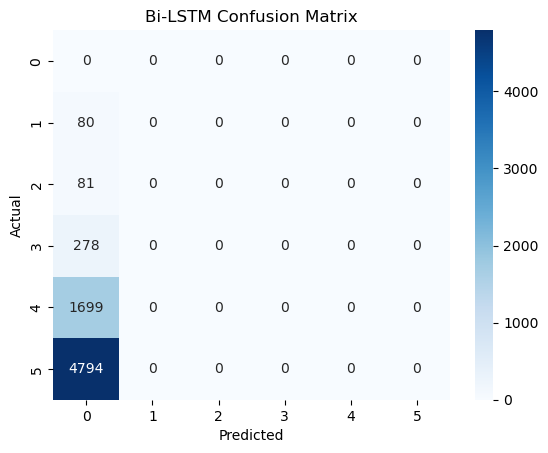

In [44]:
from sklearn.impute import SimpleImputer

# Impute missing target values in y_test with the most frequent class
imputer = SimpleImputer(strategy='most_frequent')
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1))

# Generate confusion matrix
conf_matrix_lstm = confusion_matrix(y_test_imputed.ravel(), y_pred_lstm)
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues')
plt.title("Bi-LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------ --------- 1.3/1.7 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
# Step 6: Transformer Approach using HuggingFace
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset


ModuleNotFoundError: No module named 'datasets'

In [ ]:
# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)


In [ ]:
# Tokenization
def tokenize_function(examples):
    return tokenizer(examples['reviewText'], padding='max_length', truncation=True)


In [ ]:
data_ds = Dataset.from_pandas(data)
tokenized_data = data_ds.map(tokenize_function, batched=True)


In [ ]:
# TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data,
    eval_dataset=tokenized_data
)

trainer.train()


In [ ]:
# Evaluate the model
eval_results = trainer.evaluate()
print(f"Transformer Model Accuracy: {eval_results['eval_accuracy']}")
